In [9]:
# Set up enviroment 
import math 
import pandas as pd 
import numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt 
import seaborn as sns

terror = pd.read_csv('terrorism.csv', encoding = "ISO-8859-1")

C:\Users\Kwasi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
#get to know the data a bit 
terror.info()
terror.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [12]:
#Taking the columns that are needed and renaming them 
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [22]:
#Did the war on terror prove to be a success?
#Evaluating it based on the number of attacks before war on terror 
#Splitting our dataset 

pre_wot= terror[(terror.Year <=2001)]
pre_wot.head()
post_wot = terror[(terror.Year >=2002)]
post_wot.head()
pre_wot.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


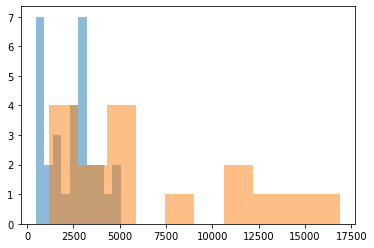

In [32]:
#plot our variables
plt.hist(pre_wot.groupby('Year').count()['Month'], alpha=.5)
plt.hist(post_wot.groupby('Year').count()['Month'], alpha=.5)
plt.show()

In [29]:
pre_wot.groupby('Year').count()['Month']

Year
1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    3495
1985    2915
1986    2860
1987    3183
1988    3721
1989    4324
1990    3887
1991    4683
1992    5071
1994    3456
1995    3081
1996    3058
1997    3197
1998     934
1999    1395
2000    1814
2001    1906
Name: Month, dtype: int64

In [28]:
pre_wot.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
city               0
latitude        3784
longitude       3785
AttackType         0
Killed          6224
Wounded         8599
Target           470
Summary        66129
Group              0
Target_type        0
Weapon_type        0
Motive         66435
dtype: int64

In [16]:
sns.choose_colorbrewer_palette()

TypeError: choose_colorbrewer_palette() missing 1 required positional argument: 'data_type'

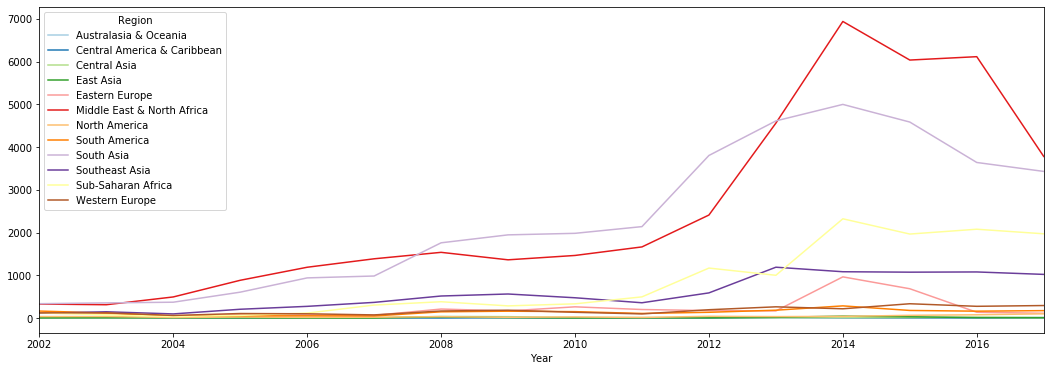

In [36]:
terror_region=pd.crosstab(post_wot.Year,post_wot.Region)
terror_region.plot(color=sns.color_palette('Paired',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

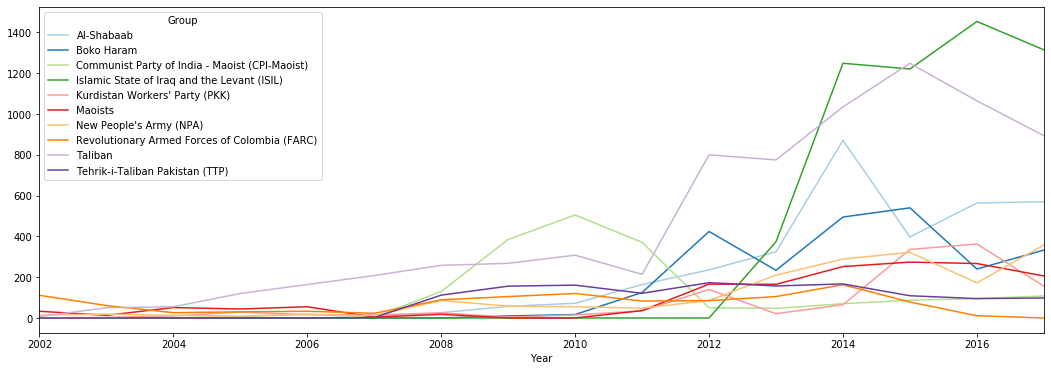

In [35]:
top_groups10=post_wot[post_wot['Group'].isin(post_wot['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()